# The Problem

Brief explanatory analysis of the dataset titanic (train dataset)

#### What is important about the titanic event?

To any disaster our interest is to understand what happened to the human lives (passengers). It would be useful for prediction of survivors posteriourly. 

#### Loading libraries

In [17]:
# Data manipulation
import pandas as pd 
import numpy as np 

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

### Dataset

In [18]:
train = pd.read_csv('./kaggle/dataset/titanic/train.csv')
test = pd.read_csv('./kaggle/dataset/titanic/test.csv')
comb = [train, test]

### Basic exploration


<img src='./kaggle/dataset/titanic/images/theportmmp.png'>


In [19]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [20]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Excluding Passangeid, there are 11 features

In [21]:
train.shape

(891, 12)

#### What's Cabin?
First letter indicates deck and the number its location.

###### Basic information

*  Features mindmap

<img src='./kaggle/dataset/titanic/images/featuresmmp.png'>


* Costs of ticket

    First Class (parlor suite) — £870/$4,350 ($50,000 today).
    First Class (berth)— £30/$150 ($1724 today).
    Second Class — £12/$60 ($690 today).
    Third Class — £3 to £8/$40 ($172 to $460 today).
> Open to more information about its numbers



#### Checking missing values

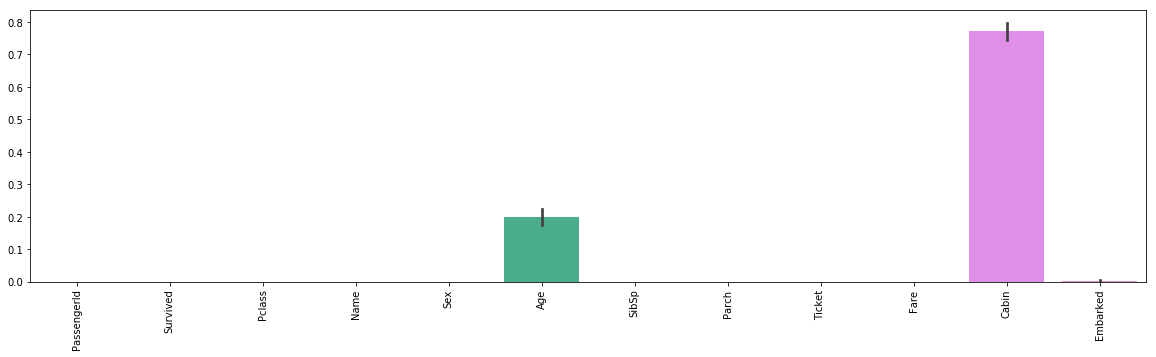

In [22]:
figure,axes=plt.subplots(1,1,figsize=(20,5))
axes = sns.barplot(data=train.isnull())
plt.xticks(rotation=90);

* How many?

In [23]:
print(train.isna().sum()[["Age", "Cabin", "Embarked"]])


Age         177
Cabin       687
Embarked      2
dtype: int64


* Mean for all fields

In [24]:
print(train.mean())

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64


#### How is the data organized ?

In [25]:
train.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Deviation of 14 years for `Age` with its Quartiles at 20, 28 and 38 years. The tax on `Fare` varies 49 with its maximum of 512 EUR.

##### Conclusion
Suspicious of outilier on `Age`. Important variation on `Fare`.

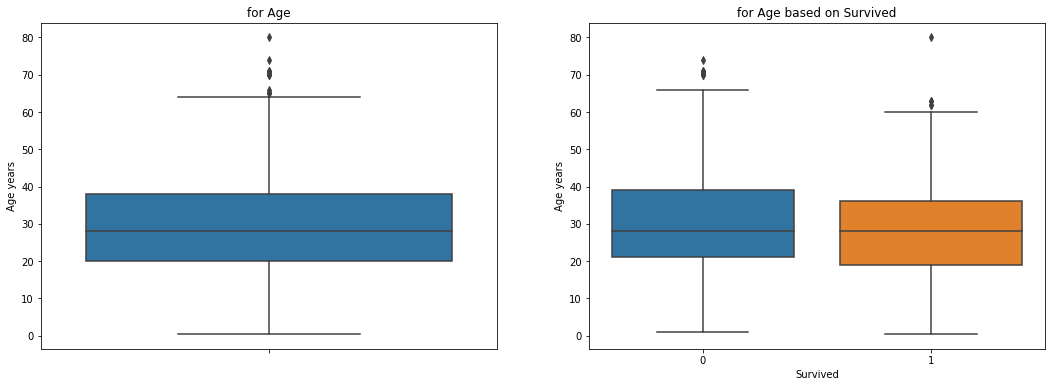

In [26]:
figure,axes=plt.subplots(1,2,figsize=(18,6))

sns.boxplot(y='Age', data=train, ax=axes[0])
sns.boxplot(x='Survived', y='Age', data=train, ax=axes[1])

axes[0].set_title('for Age')
axes[0].set_ylabel('Age years')

axes[1].set_title('for Age based on Survived')
axes[1].set_ylabel('Age years')

plt.show()

    It counts for 38%, thus 62% of the passengers died. 

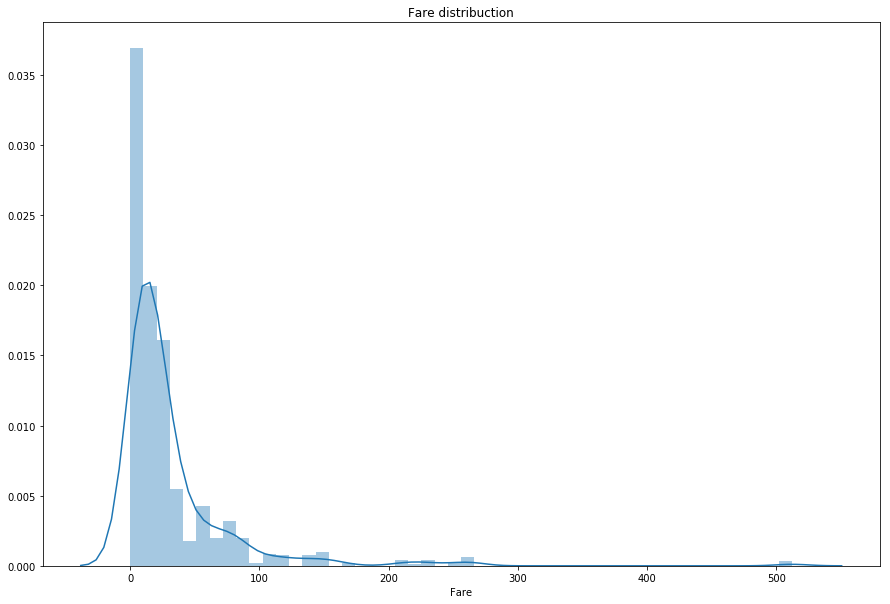

In [27]:
figure,axes=plt.subplots(1,1,figsize=(15,10))
sns.distplot(train.Fare,ax=axes)
axes.set_title('Fare distribuction')
plt.show()

Most people pay less than 100 for `Fare`. 
#### Is there a correlation between `Fare` and `Class`?

What is Class?

In [28]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Finer with Heatmap (need color)

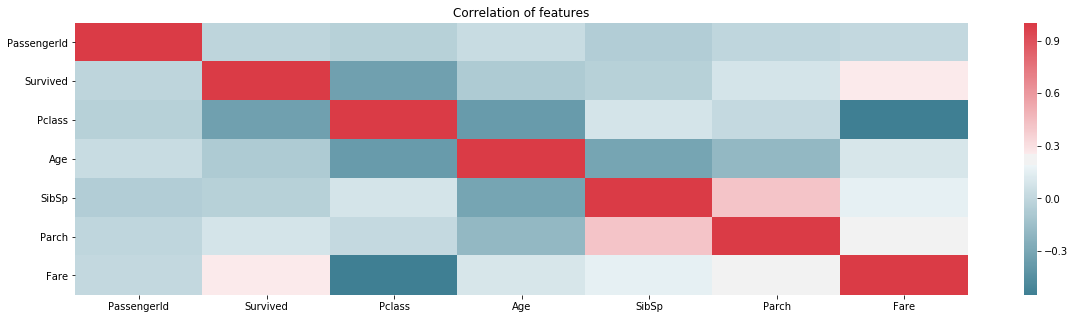

In [29]:
colormap = sns.diverging_palette(220, 10, as_cmap = True)
figure,axes=plt.subplots(1,1,figsize=(20,5))

sns.heatmap(data=train.corr(),ax=axes, cmap=colormap)
axes.set_title('Correlation of features')
plt.show()

#### Gender 

In [30]:
train.groupby('Sex').agg('sum')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


#### Scatter plot of all numeric features

In [31]:
ntypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_nric = train.select_dtypes(include=ntypes)

In [32]:
limit = 10 # ten Occurrencies
train_nric[:limit]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,NaN,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


    * Regression

/usr/lib64/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib64/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


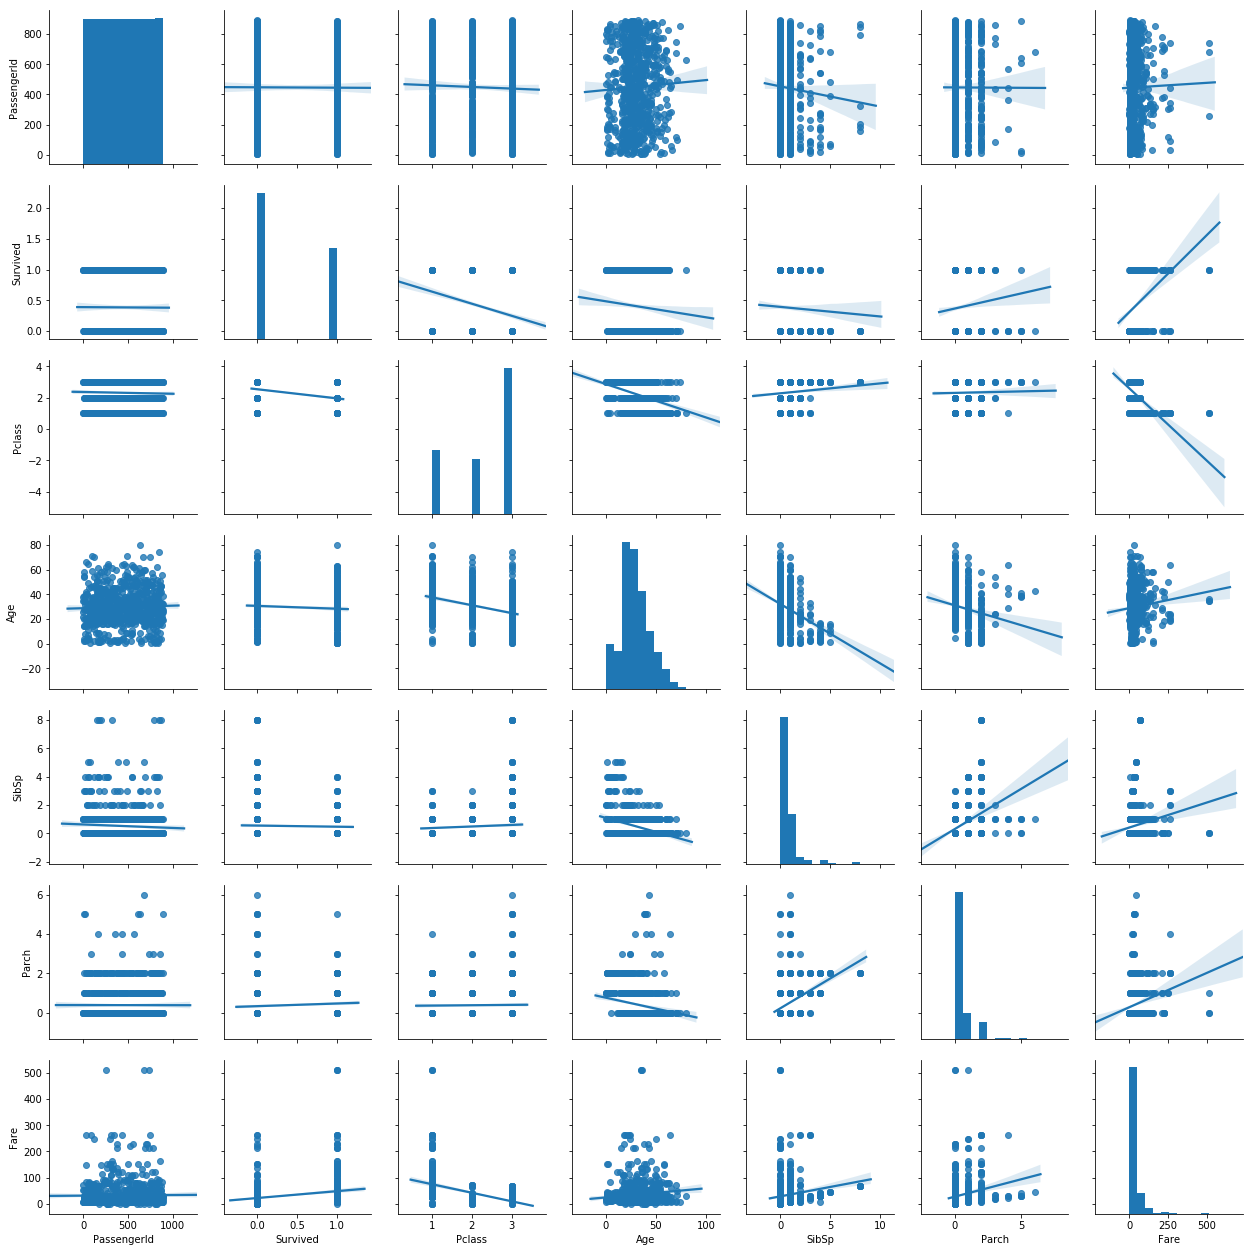

In [33]:
sns.pairplot(train_nric, kind="reg")
plt.show()

Interested `Fare`on other parameters: 
* `Parents and children`, `siblings and spouse`, and `Class` with graph inverted, increase with fare. 
* `Age` increases fare slightly, → Is it related to special treatment?

And multiple observation

What does the features tell about `Survived`?
* The older the passengers the smaller is the number of survivors (2,4).
* Passengers group that paid higher cost had greater number of survivors (2, 3)
* `Parents and children` determined more survivors (2,5), while `Singlings and Spouse` less survivors (2,4) 
* The most important factor for survivors was `Fare`.

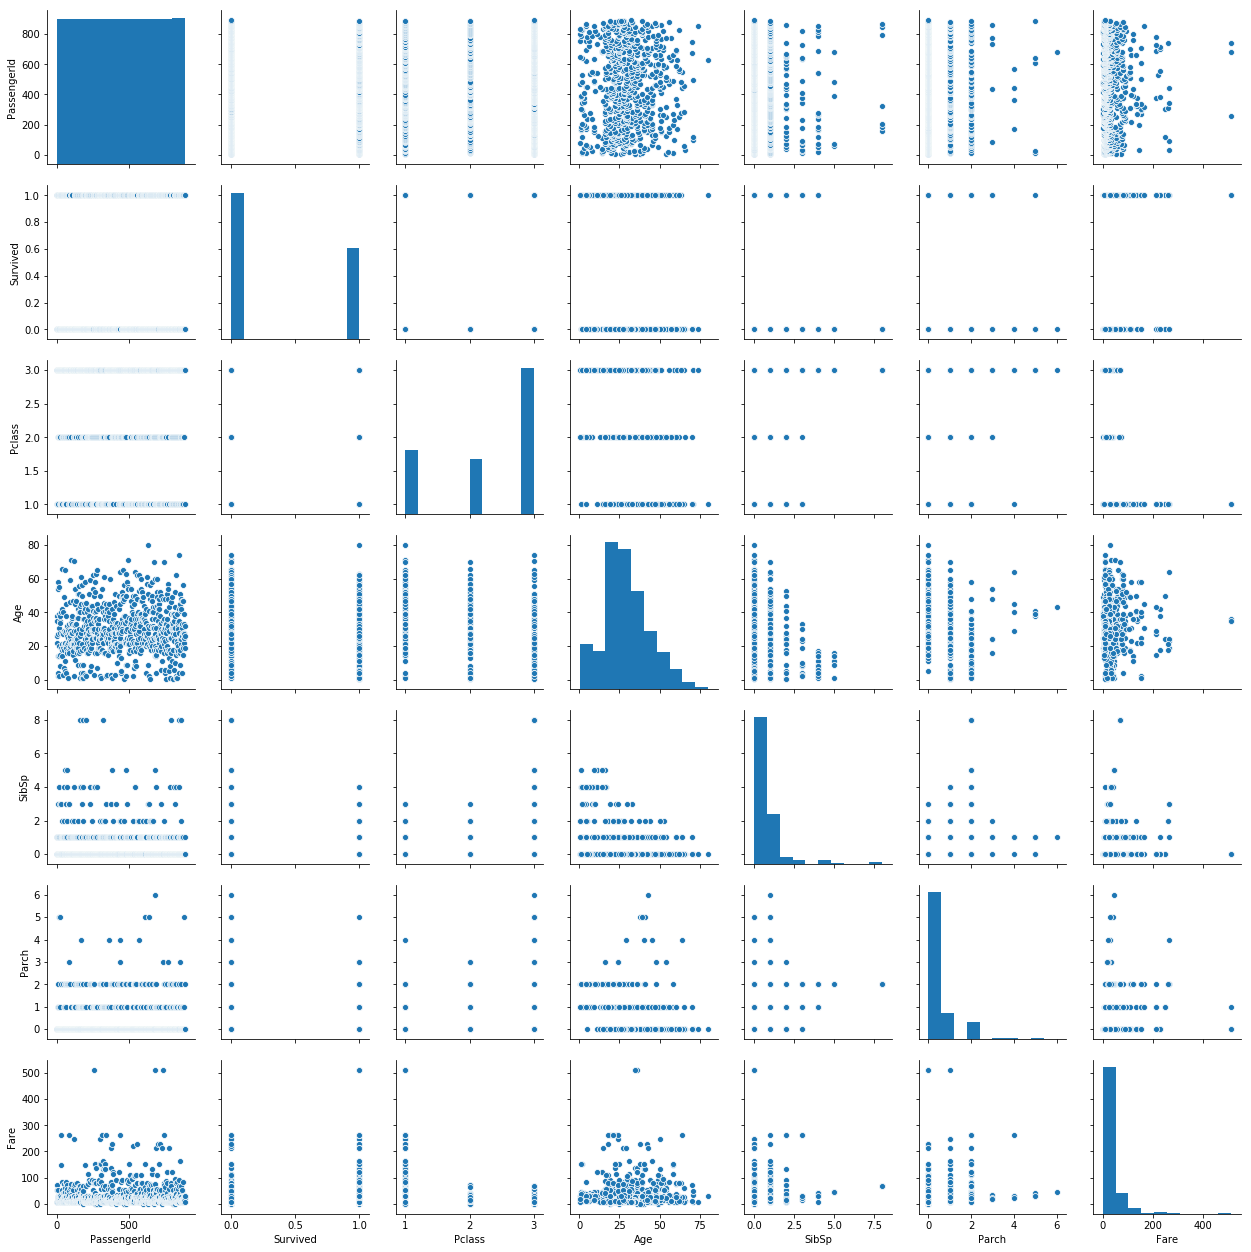

In [34]:
# without regression
sns.pairplot(train_nric, kind="scatter")
plt.show()

* Middle aged passengers(surroundings of 50% Quartil on `Age`) had paid higher `Fare`, which is not true fot `Parents and Children`(It would have determined less survivors for young passengers)

For now this basic explanation is enough to start modeling.

## Thank you for reading
